**Estimating CO2 emission of a new car using regression**

**how to download the data set?**

open terminal and enter the following command:

!wget - O FuelConsumption.csv https: // s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv


<h2 id="understanding_data">Understanding the Data</h2>

### `FuelConsumption.csv`:
We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUELTYPE** e.g. z
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


## import packages and load data

In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matlearn.models import LinearRegressor
from matlearn.preprocessing import split_train_test
import seaborn as sns
plt.style.use('ggplot')
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv')

## take a look at  the dataset.

In [3]:
print(f'''shape : {df.shape} \n\nkeys : {df.keys()}''')

shape : (1067, 13) 

keys : Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')


In [4]:
print(f'''manufactors:\n\n{df['MAKE'].unique()}''')

manufactors:

['ACURA' 'ASTON MARTIN' 'AUDI' 'BENTLEY' 'BMW' 'BUICK' 'CADILLAC'
 'CHEVROLET' 'CHRYSLER' 'DODGE' 'FIAT' 'FORD' 'GMC' 'HONDA' 'HYUNDAI'
 'INFINITI' 'JAGUAR' 'JEEP' 'KIA' 'LAMBORGHINI' 'LAND ROVER' 'LEXUS'
 'LINCOLN' 'MASERATI' 'MAZDA' 'MERCEDES-BENZ' 'MINI' 'MITSUBISHI' 'NISSAN'
 'PORSCHE' 'RAM' 'ROLLS-ROYCE' 'SCION' 'SMART' 'SRT' 'SUBARU' 'TOYOTA'
 'VOLKSWAGEN' 'VOLVO']


#### expand the model year to the range of 2014 to 2020

In [5]:
df['MODELYEAR'].iloc[np.random.randint(
    0, 1067, 700)] = np.random.choice([2015, 2016, 2017, 2018, 2019, 2020], 700)
df['MODELYEAR'].unique()

array([2014, 2018, 2019, 2017, 2016, 2015, 2020], dtype=int64)

### plotting 

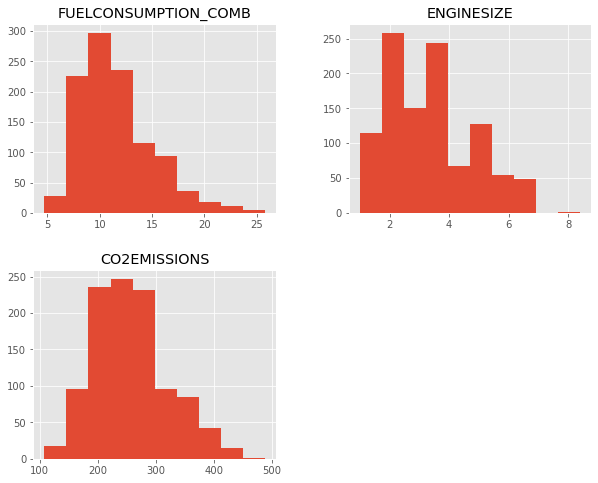

In [6]:
x = df[['FUELCONSUMPTION_COMB', 'ENGINESIZE','CO2EMISSIONS' ]]
x.hist(figsize=(10,8));
plt.show()

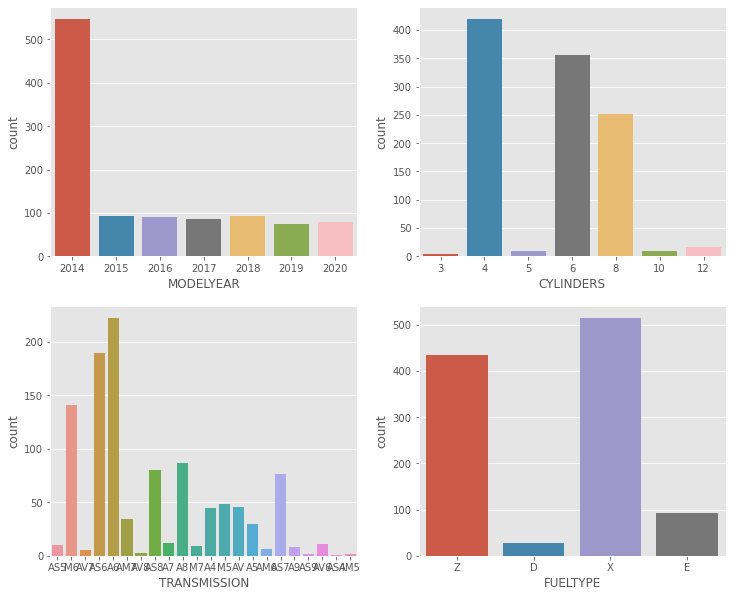

In [7]:
val_fig = plt.figure(num='value counts', figsize=(12.1, 10.1))
plt.subplot(2, 2, 1)
sns.countplot(df['MODELYEAR'])
plt.subplot(2, 2, 2)
sns.countplot(df['CYLINDERS'])
plt.subplot(2, 2, 3)
sns.countplot(df['TRANSMISSION'])
plt.subplot(2, 2, 4)
sns.countplot(df['FUELTYPE'])
plt.show()

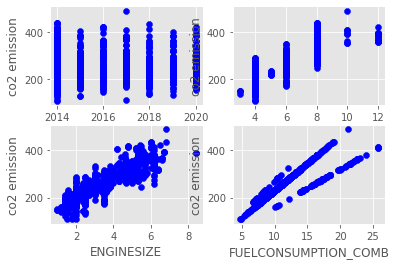

In [8]:
plt.subplot(2, 2, 1)
plt.scatter(df['MODELYEAR'], df['CO2EMISSIONS'], c='blue')
plt.xlabel('MODELYEAR')
plt.ylabel('co2 emission')
plt.subplot(2, 2, 2)
plt.scatter(df['CYLINDERS'], df['CO2EMISSIONS'], c='blue')
plt.xlabel('CYLINDERS')
plt.ylabel('co2 emission')
plt.subplot(2, 2, 3)
plt.scatter(df['ENGINESIZE'], df['CO2EMISSIONS'], c='blue')
plt.xlabel('ENGINESIZE')
plt.ylabel('co2 emission')
plt.subplot(2, 2, 4)
plt.scatter(df['FUELCONSUMPTION_COMB'], df['CO2EMISSIONS'], c='blue')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('co2 emission')
plt.show()

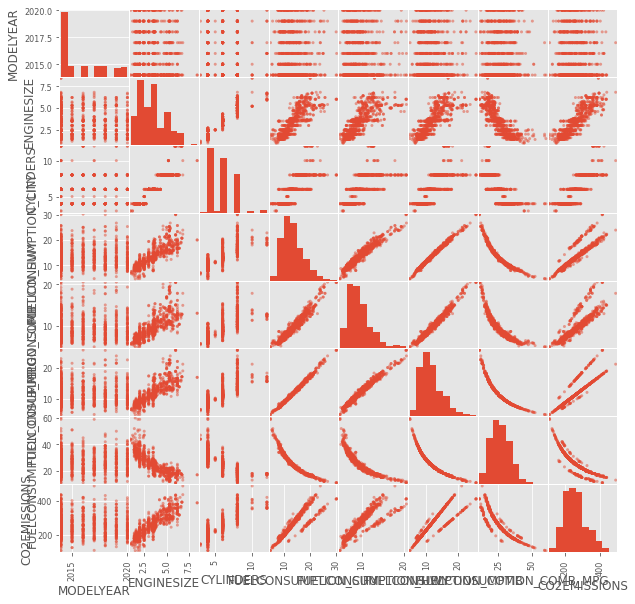

In [9]:
f_df = pd.DataFrame(df, columns=df.keys())
pd.plotting.scatter_matrix(f_df,  figsize=(10, 10))
plt.show()

## create a simple linear regression model

In [10]:
sample_data = np.asarray(df[['ENGINESIZE', 'CO2EMISSIONS']])
x = sample_data[:, 0].reshape(-1,1)
y = sample_data[:, 1].reshape(-1,1)

### plot

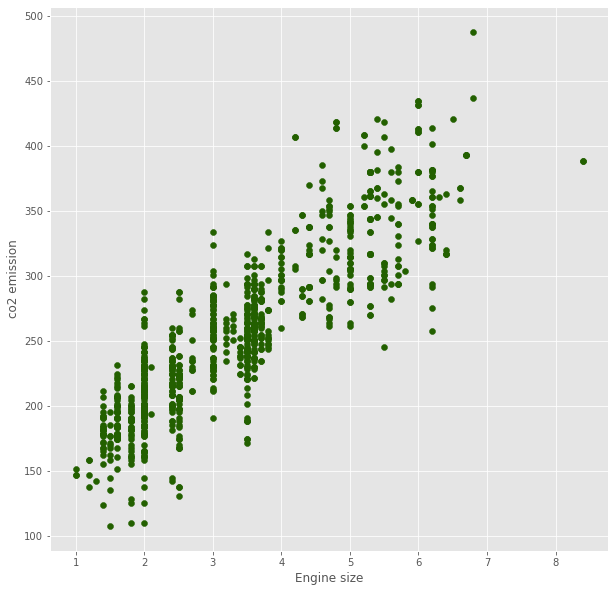

In [11]:
# plotting the new data
fig = plt.figure(figsize=(10,10))
plt.scatter(sample_data[:, 0], sample_data[:, 1], c='#236000')
plt.xlabel('Engine size')
plt.ylabel('co2 emission')
plt.show()

## train

### using matlearn

In [12]:
train_x, test_x, train_y, test_y = split_train_test(x,y,shuffle=True)

In [13]:
clf = LinearRegressor(lr=.12, train_bias=True, n_reports=200, maxEpoch=1000,
                      converLim=.0001, n_converLim=1, use_validation=False, n_iter_per_epoch=1, regulariz_type='L2', alpha=0.001)
clf.train(train_x, train_y)



 **** EPOCH 1 ****

iter   1: training loss = 68113.43


 **** EPOCH 2 ****

iter   1: training loss = 32252.11


 **** EPOCH 3 ****

iter   1: training loss = 15972.92


 **** EPOCH 4 ****

iter   1: training loss = 8556.03


 **** EPOCH 5 ****

iter   1: training loss = 5171.24


 **** EPOCH 6 ****

iter   1: training loss = 3607.45


 **** EPOCH 7 ****

iter   1: training loss = 2875.82


 **** EPOCH 8 ****

iter   1: training loss = 2518.63


 **** EPOCH 9 ****

iter   1: training loss = 2334.51


 **** EPOCH 10 ****

iter   1: training loss = 2227.95


 **** EPOCH 11 ****

iter   1: training loss = 2158.40


 **** EPOCH 12 ****

iter   1: training loss = 2105.60


 **** EPOCH 13 ****

iter   1: training loss = 2061.57


 **** EPOCH 14 ****

iter   1: training loss = 2021.85


 **** EPOCH 15 ****

iter   1: training loss = 1984.93


 **** EPOCH 16 ****

iter   1: training loss = 1949.76


 **** EPOCH 17 ****

iter   1: training loss = 1916.07


 **** EPOCH 18 ****

iter   1: trai

In [14]:
print(clf.bias,clf.weight)

[125.777871] [[39.05634229]]


In [15]:
from sklearn.metrics import mean_squared_error
p = clf.predict(test_x)
mean_squared_error(test_y,p)

1066.8093846203717

### using sikit learn

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
sk_clf = LinearRegression()
x_train, x_test, y_train, y_test = split_train_test(x,y,shuffle=True)
sk_clf.fit(x_train,y_train)

LinearRegression()

In [18]:
sk_clf.intercept_ , sk_clf.coef_

(array([123.3383937]), array([[39.78857581]]))

In [19]:
sk_p = sk_clf.predict(x_test)
mean_squared_error(y_test,sk_p)

1089.714642353321

### plotting the hypothesis function

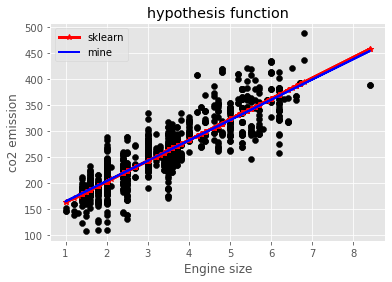

In [20]:
hyp_sk = train_x * sk_clf.coef_ + sk_clf.intercept_
hyp_me = train_x * clf.weight + clf.bias
plt.title('hypothesis function')
plt.plot(train_x, hyp_sk, label='sklearn', linewidth=3, color='red',marker='*')
plt.plot(train_x, hyp_me, label='mine', linewidth=2, color='blue')
plt.scatter(sample_data[:, 0], sample_data[:, 1], c='black')
plt.xlabel('Engine size')
plt.ylabel('co2 emission')
plt.legend()
plt.show()

### estimating a new car co2 emission

In [21]:
eng = 100
predicted = eng * clf.weight + np.array(clf.bias).reshape(-1,1)
print('''estimated co2 emission for a car with engine size {} is: \n{} '''.format(
    eng, predicted[0, 0]))

estimated co2 emission for a car with engine size 100 is: 
4031.4121001451686 


### create a multiple linear regression

In [22]:
mlr_model = df[['ENGINESIZE', 'CYLINDERS',
                'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
X = np.asarray(mlr_model[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
Y = np.asarray(mlr_model[['CO2EMISSIONS']])

In [23]:
X_train, X_test, Y_train, Y_test = split_train_test(X, Y, shuffle=True)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(853, 3) (214, 3) (853, 1) (214, 1)


In [24]:
CLF = LinearRegressor(lr=.0101,train_bias=True,n_reports=200,maxEpoch=5000,converLim=.0001,n_converLim=5,n_iter_per_epoch=1,use_validation=False)
CLF.train(X_train,Y_train)



 **** EPOCH 1 ****

iter   1: training loss = 71674.53


 **** EPOCH 2 ****

iter   1: training loss = 67949.62


 **** EPOCH 3 ****

iter   1: training loss = 64420.54


 **** EPOCH 4 ****

iter   1: training loss = 61076.96


 **** EPOCH 5 ****

iter   1: training loss = 57909.17


 **** EPOCH 6 ****

iter   1: training loss = 54907.87


 **** EPOCH 7 ****

iter   1: training loss = 52064.35


 **** EPOCH 8 ****

iter   1: training loss = 49370.28


 **** EPOCH 9 ****

iter   1: training loss = 46817.84


 **** EPOCH 10 ****

iter   1: training loss = 44399.54


 **** EPOCH 11 ****

iter   1: training loss = 42108.37


 **** EPOCH 12 ****

iter   1: training loss = 39937.61


 **** EPOCH 13 ****

iter   1: training loss = 37880.95


 **** EPOCH 14 ****

iter   1: training loss = 35932.37


 **** EPOCH 15 ****

iter   1: training loss = 34086.22


 **** EPOCH 16 ****

iter   1: training loss = 32337.07


 **** EPOCH 17 ****

iter   1: training loss = 30679.87


 **** EPOCH 18 ****



In [25]:
print(CLF.bias,'\n\n',CLF.weight)

[59.72084286] 

 [[7.71339063]
 [9.85335683]
 [9.71608825]]


In [26]:
from sklearn.metrics import mean_squared_error
P = CLF.predict(X_test)
mean_squared_error(Y_test,P)

551.5612638996038

## using sikit learn

In [27]:
SK_CLF = LinearRegression()
SK_CLF.fit(X_train,Y_train)

LinearRegression()

In [28]:
SK_CLF.intercept_ , SK_CLF.coef_

(array([65.28513132]), array([[9.71799471, 8.41377319, 9.39805776]]))

In [29]:
SK_P = SK_CLF.predict(X_test)
mean_squared_error(Y_test,SK_P)

548.5344058755874

In [30]:
eng, cyl, fue = 100,100,100
predicted = (np.array([[eng, cyl, fue]]) @ CLF.weight) + CLF.bias
print('''estimated co2 emission for the car is: \n{} '''.format(
    int(predicted)))

estimated co2 emission for the car is: 
2788 


thanks!